In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

For data manipulation and visualization, this code imports the necessary libraries and modules. NumPy is used for large, multi-dimensional arrays and matrices, and Pandas is used to manipulate and analyze data. Additionally, it imports the MinMaxScaler module from the scikit-learn library, which is used for data preprocessing tasks, and the pyplot module from the Matplotlib library, which is used for data visualization.

In Python, NumPy is a library that is commonly used for numerical operations and scientific computing. It allows for efficient handling of arrays and matrices, making it easier to perform calculations on large datasets. Pandas is widely used for data analysis. Structured data, such as tabular data, can be handled and manipulated easily using it. Pandas offers various data structures and functions that simplify tasks like data cleaning, transformation, and analysis. Feature scaling is performed using the MinMaxScaler module from the scikit-learn library. By scaling the input data, each feature is placed within a specific range, typically between 0 and 1. This scaling technique is commonly used in machine learning algorithms to ensure that all features have the same importance and prevent any one feature from dominating the others. Visualization is done using Matplotlib's pyplot module. Different types of plots, such as line plots, bar plots, and scatter plots, can be created with it. These visualizations can help in understanding patterns, trends, and relationships within the data. Overall, this code imports essential libraries and modules for manipulating, preprocessing, and visualizing data. To handle, preprocess, and visualize data effectively, these tools are commonly used in data analysis and machine learning.

In [2]:
data_present=pd.read_csv('data/present.csv')
data_present.head()

,Ntime,Time,Open Price,Closing Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA5,MA10,MTM6,MTM12,ROC,SMI,WVAD,US dollar Index,Federal Fund Rate
0,20080701,733590,11344.64,11382.26,11407.90,11183.43,299589749.0,-301.153786,-132.292916,224.47,...,11910.843098,11468.806,11692.866,-460.10,-925.09,-7.516565,-0.053770,-1.184778e+07,72.34,2.11
1,20080702,733591,11382.34,11215.51,11434.12,11214.37,230692051.0,-318.760975,-114.927781,219.75,...,11844.620899,11349.542,11611.511,-591.92,-1053.57,-8.587196,-0.070262,-1.422755e+07,71.99,1.95
2,20080703,733592,11216.00,11288.54,11337.48,11157.21,148755195.0,-323.097423,-99.650537,180.27,...,11791.660813,11316.566,11534.056,-523.29,-871.76,-7.168902,-0.046793,-1.336611e+07,72.73,1.92
3,20080707,733596,11289.19,11231.96,11399.11,11120.74,248235090.0,-327.326407,-87.637530,278.37,...,11738.355974,11293.656,11472.983,-114.55,-831.13,-6.889860,-0.051544,-1.260938e+07,72.71,1.99
4,20080708,733597,11225.03,11384.21,11391.13,11174.88,271497765.0,-314.764200,-64.637113,216.25,...,11704.627786,11300.496,11427.168,34.20,-458.48,-3.871418,-0.035844,-9.533881e+06,72.96,1.97


The code reads a CSV file named 'present.csv' and assigns the data to a variable called 'data_present'. CSV files contain tabular data in the form of rows and columns. The 'read_csv' function from the Pandas library is used to read the contents of the file and convert it into a Pandas DataFrame. The first few rows of the DataFrame are displayed using 'data_present.head()'. Getting a quick overview of the data's structure and contents is easy with the 'head()' function. By default, it displays the first five rows of the DataFrame. You can use this code snippet when loading a CSV file into your Python program. In order to gain a preliminary understanding of the dataset, you can quickly check column names, data types, and sample values. To ensure that the data is loaded correctly and to get an idea of how the data looks before further analysis or manipulation, this step is often performed at the beginning of a data analysis or data preprocessing workflow.

In [3]:
for i in data_present.columns:
    if(i!='Ntime' and i!='Time'):
        scaler = MinMaxScaler()
        data_present[i]=scaler.fit_transform(data_present[i].values.reshape(-1, 1))

In this code snippet, the columns of a DataFrame named 'data_present' are transformed. It loops over each column in the DataFrame using the 'for' loop. It checks if each column name is not equal to 'Ntime' or 'Time'. These conditions exclude the columns named 'Ntime' and 'Time' from the transformation. The 'MinMaxScaler' object is created using the scikit-learn function 'MinMaxScaler()'. The 'MinMaxScaler' is a data preprocessing technique that scales the values of a feature (column) to a specific range, typically between 0 and 1. Then, the 'fit_transform' method is applied. As the scaler expects a 2D input, it first reshapes the column values into a 2-dimensional array using '.values.reshape(-1, 1)'. In order to perform the transformation, the column's values are scaled to the desired range, and then the transformed values are assigned back to the column in the 'data_present' DataFrame, overwriting the original values. When you need to normalize a DataFrame column, you can use this code. In machine learning and data analysis, normalization is used to bring all features to a similar scale, preventing any one feature from dominating the others. It applies the MinMax scaling technique to all columns except 'Ntime' and 'Time', making the values in those columns comparable and suitable for further analysis or modeling.

In [4]:
a=pd.to_datetime(data_present['Ntime'].astype('str'),yearfirst=True).dt.date
data_present['Ntime']=a
data_present['Date']=data_present['Ntime']
data_present['Year']=pd.DatetimeIndex(data_present['Ntime']).year
data_present['month']=pd.DatetimeIndex(data_present['Ntime']).month
data_present['date']=pd.DatetimeIndex(data_present['Ntime']).day
data_present.drop(['Ntime','Time'],axis=1,inplace=True)

This code snippet performs various operations on the DataFrame 'data_present' related to date and time manipulation. The first operation is to convert the values in the 'Ntime' column to datetime format using the Pandas 'pd.to_datetime' function. Before converting column values to datetime objects, the 'astype('str')' method is used. The 'yearfirst=True' parameter ensures that the format is interpreted correctly, assuming the year comes first in the date string. Next, it extracts only the date portion from the datetime objects. 'A' is a new variable that holds the resulting date values. In the 'data_present' DataFrame, it replaces the original datetime values with the extracted date values by assigning the values from the 'a' variable to the 'Ntime' column.

After that, it creates new columns in the DataFrame. Dates are duplicated in the 'Date' column because they are created and populated with values from the 'Ntime' column. 'pd.DatetimeIndex(data_present['Ntime']).year' extracts the year component from the 'Ntime' column and assigns it to 'Year'. Similarly, the 'month' column is created by extracting the month component, and the 'date' column is created by extracting the day component from the 'Ntime' column. By using the 'drop' method with the 'axis=1' parameter, the 'Ntime' and 'Time' columns are dropped from the 'data_present' DataFrame. This operation removes the specified columns from the DataFrame. In total, this code snippet manipulates the date and time values of the 'data_present' DataFrame. The 'Ntime' column is converted to a datetime format, the date portion is extracted, new columns are created for year, month, and day, and the original 'Ntime' and 'Time' columns are dropped. It is often necessary to perform these transformations when the date and time components need to be separated or when specific analyses or visualizations require the date-related information to be separated.

In [5]:
data_present=data_present[(data_present['Year']==2015) | (data_present['Year']==2016) | (data_present['Year']==2014) | (data_present['Year']==2013) | ((data_present['Year']==2012) & ((data_present['month']==10) | (data_present['month']==11) | (data_present['month']==12) | ((data_present['month']==9) & (data_present['date']==28))))]
validation=data_present[(data_present['Year']==2016) & ((data_present['month']==6) | (data_present['month']==5) | (data_present['month']==4))]
test=data_present[(data_present['Year']==2016) & ((data_present['month']==7) | (data_present['month']==8) | (data_present['month']==9))]
train=data_present[(data_present['Year']==2012)| (data_present['Year']==2013) | (data_present['Year']==2014) | (data_present['Year']==2015) | ((data_present['Year']==2016) & ((data_present['month']==1) | (data_present['month']==2) | (data_present['month']==3))) ]
validation.drop(['Year','month','date'],axis=1,inplace=True)
train.drop(['Year','month','date'],axis=1,inplace=True)
test.drop(['Year','month','date'],axis=1,inplace=True)
validation=validation.reset_index(drop=True)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


According to specific conditions related to the year, month, and date values in the 'data_present' DataFrame, this code snippet splits the DataFrame into three subsets: 'validation', 'test', and 'train'. With the first line of code, only rows where the year is 2015, 2016, 2014, 2013, or 2012 are included in the 'data_present' DataFrame. A logical OR () and AND (&) operator connects several conditions to define this filter. By filtering the 'data_present' DataFrame further to include only rows where the year is 2016 and the month is 6, 5, or 4, the second line of code creates the validation subset. By filtering the 'data_present' DataFrame to include only rows with years 2016, 7, 8, or 9, the third line of code creates the 'test' subset.  The fourth line of code creates the 'train' subset by Filtering the 'data_present' DataFrame to include rows with a specific month condition for 2012, 2013, 2014, 2015, or 2016. Using the 'drop' method with the 'axis=1' parameter, the next three lines of code remove the 'Year', 'month', and 'date' columns from the 'validation', 'train', and 'test' subsets after creating the subsets. As a result of the filtering and column removal operations, these columns are removed from each subset. In the final three lines of code, the index of each subset is reset, reassigning new index values to reflect the updated subset. Using specific conditions relating to the year, month, and date values, this code divides the DataFrame 'data_present' into three subsets ('validation', 'test', and 'train'). A subset is filtered and modified according to the specified conditions, and unnecessary columns are removed. New index values are then applied to the resulting subsets. In machine learning or data analysis, these subsets can be used for training, validation, and testing.

In [63]:
for i in train.columns:
    if(i!='Date'):
        scaler = MinMaxScaler()
        train[i]=scaler.fit_transform(train[i].values.reshape(-1, 1))
for i in validation.columns:
    if(i!='Date'):
        scaler = MinMaxScaler()
        validation[i]=scaler.fit_transform(validation[i].values.reshape(-1, 1))
for i in test.columns:
    if(i!='Date'):
        scaler = MinMaxScaler()
        test[i]=scaler.fit_transform(test[i].values.reshape(-1, 1))

The code snippet performs feature scaling on the 'train', 'validation', and 'test' subsets. It applies the MinMaxScaler transformation to each column of these subsets, excluding the 'Date' column. It starts by iterating over the columns of the 'train' DataFrame. In each column, it checks whether the column name does not equal 'Date'. In this case, it creates a 'MinMaxScaler' object and applies the fit_transform method to scale the value of the column within a specific range (typically between 0 and 1). The original column values are reshaped into a 2-dimensional array before the scaling is performed. Separate loops are run for 'validation' and 'test' DataFrames. As a result, the code iterates over the columns of each DataFrame, excluding the 'Date' column, applying the MinMaxScaler transformation to each column.

By performing feature scaling, this code ensures that the values of each feature (column) in the 'train', 'validation', and 'test' subsets are normalized to a common scale. It prevents features with larger value ranges from dominating the model training process in machine learning tasks. During training, it allows the model to give equal importance to all features by scaling the features to a consistent range. Using this code snippet, each column in the 'train', 'validation', and 'test' subsets is transformed using MinMaxScaler, excluding the 'Date' column. By standardizing feature values within a specific range, it makes them suitable for modeling or analysis tasks.

In [6]:
train.to_csv('data/train.csv',index=False)
test.to_csv('data/test.csv',index=False)
validation.to_csv('data/validation.csv',index=False)

It saves the 'train', 'test', and 'validation' DataFrames as separate CSV files. It exports the data from each DataFrame into a file with the specified file name and location. For example, it saves the 'train' DataFrame as a CSV file. DataFrames are converted into CSV files using the 'to_csv' method from the Pandas library. The 'index=False' parameter is set to exclude the index column from being saved in the CSV file. The second line of code saves the 'test' DataFrame as a CSV file. Similarly, the 'index=False' parameter is used to exclude the index column from the CSV file. The third line of code saves the 'validation' DataFrame as a CSV file named 'validation.csv'. Again, the 'index=False' parameter is used to exclude the index column from the CSV file. This allows the data to be persistent and portable. CSV files can easily be shared, accessed, and loaded into other programs or tools for analysis, modeling, or visualization. Typically, this step is performed when the processed or transformed data needs to be stored as separate files for future use or to feed other pipelines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import os
from os import listdir
from os.path import isfile, join

This code snippet imports several libraries and modules in Python that are commonly used for machine learning and data analysis tasks.  Array manipulation and efficient numerical operations are supported by the 'numpy' library, which is imported as 'np'. As 'pd', the 'pandas' library is imported for data manipulation and analysis, providing data structures and functions to work with structured data. As 'plt', the 'matplotlib.pyplot' module is imported for data analysis and analysis. The torch library is imported and is the main library for deep learning in Python. Several classes and functions for defining and training neural networks are imported in the 'torch.nn' module, which supports tensor computations and neural network models. For backpropagation in neural network training, the 'torch.autograd.Variable' class allows automatic differentiation of tensors. An optimization algorithm for neural network training is provided by the 'optim' module from the torch library. As 'F', the 'torch.nn.functional' module provides various functions commonly used in neural network models, such as activation functions and loss functions. In this module, classes and functions are provided to handle datasets during training and create data loaders. As part of the 'torchvision' library, the 'transforms' module provides common image transformations and data augmentation techniques.  The 'os' module Imported functions include manipulating file paths and directories, as well as interacting with the operating system. The 'listdir' function and 'isfile' and 'join' methods from the 'os.path' module are imported, and they are used to list files in a directory, check if a file exists, and join file paths. This code imports a number of libraries and modules to perform machine learning and data analysis tasks in Python. Numerical operations, data manipulation, visualization, deep learning, optimization, dataset handling, image transformations, and operating system interaction are all supported by these libraries.

In [2]:
train_df=pd.read_csv('data/train.csv')
validation_df=pd.read_csv('data/validation.csv')
validation_df=pd.concat([train_df[-9:],validation_df])
validation_df=validation_df.reset_index(drop=True)
test_df=pd.read_csv('data/test.csv')
test_df=pd.concat([validation_df[-9:],test_df])
test_df=validation_df.reset_index(drop=True)
train_df.drop(['High price', 'Low Price', 'Date'],axis=1,inplace=True)
validation_df.drop(['High price', 'Low Price', 'Date'],axis=1,inplace=True)
test_df.drop(['High price', 'Low Price','Date'],axis=1,inplace=True)

Data from CSV files is read by this code snippet and assigned to the DataFrame variables 'train_df', 'validation_df', and 'test_df'. As the first line of code reads the data from the 'train.csv' file, the second line reads the data from the 'validation.csv' file and assigns it to the 'validation_df' DataFrame. A third line of code concatenates the last 9 rows of the 'train_df' DataFrame with the 'validation_df' DataFrame. The concatenated rows are placed at the end of the 'validation_df' DataFrame after merging the data from the two DataFrames. As a result of the concatenation, the index of the 'validation_df' DataFrame is reset in line 4. A fifth line of code reads the data from 'test.csv' and assigns it to the 'test_df' DataFrame. A sixth line concatenates the last nine rows of the 'validation_df' DataFrame with the 'test_df' DataFrame. The last line of code resets the index of the 'test_df' DataFrame to reflect the updated order of the rows after the concatenation of the data from the two DataFrames. Using the 'drop' method with the 'axis=1' parameter, the last three lines of code remove specific columns from the 'train_df', 'validation_df', and 'test_df' DataFrames ('High price', 'Low price', and 'Date'). This operation removes these columns from each DataFrame. The code snippet reads the data from CSV files into separate DataFrames. It concatenates rows from the 'train_df' DataFrame with rows from the 'validation_df' DataFrame, and rows from the 'validation_df' DataFrame with rows from the 'test_df' DataFrame. The resulting DataFrames are then indexed again and specific columns are removed. In machine learning tasks, these operations are commonly used to prepare the data for training, validation, and testing, such as removing unnecessary columns and ensuring the data is in the right order.

In [3]:
class dataprep(Dataset):
    def __init__(self, dataframe):
        self.df=dataframe
    def __len__(self):
        return self.df.shape[0]-10
    def __getitem__(self,idx):
        if (idx+10<self.df.shape[0]):
            X=torch.from_numpy(self.df.drop('Closing Price',axis=1)[idx:idx+10].values)
            targets=torch.from_numpy(self.df['Closing Price'][idx:idx+9].values)
            y=torch.tensor([self.df['Closing Price'].loc[idx+9]])
            return ({'X':X, 'targets':targets, 'y': y})

The code defines a custom class named 'dataprep' that inherits from PyTorch's 'Dataset' class. This class is intended to prepare and provide data for a machine learning model. The '__init__' method is the class constructor, and it takes a DataFrame as an input parameter and assigns it to the 'self.df' attribute of the class. By subtracting 10 rows from the DataFrame, the '__len__' method returns the size of the dataset. The '-10' is used to account for the requirement of having a sequence length of 10 in the subsequent '__getitem__' method. This method retrieves a specific sample given an index 'idx'. It first checks if 'idx+10' is within the range of the DataFrame to ensure that a sequence of length 10 can be extracted. The method then prepares the sample data. 'X' contains the feature values of the DataFrame from index 'idx' to 'idx+10' (excluding the 'Closing Price' column). As well, it creates a tensor 'targets' containing the 'Closing Price' values from index 'idx' to 'idx+9' (excluding 'idx+9'). Additionally, a tensor 'y' is created to hold the value of the 'Closing Price' at 'idx+9'. The method returns a dictionary with the keys 'X', 'targets', and 'y', representing the input features, target values, and value to be predicted. These tensors are converted to PyTorch tensors or arrays for compatibility with PyTorch models and training procedures. To summarize, this code defines a custom class 'dataprep' that inherits from PyTorch's dataset class. Using a DataFrame, it extracts sequences of feature values and corresponding target values. To facilitate training and evaluation of machine learning models, this class organizes and accesses the data in a structured manner.

In [4]:
train_set=dataprep(dataframe=train_df)
validation_set=dataprep(dataframe=validation_df)
test_set=dataprep(dataframe=test_df)

This code snippet creates instances of the 'dataprep' class for the 'train_df', 'validation_df', and 'test_df' DataFrames, respectively. The first line creates an instance of the 'dataprep' class named 'train_set', and passes the 'train_df' DataFrame as its input. This initializes the 'train_set' object with the data from the 'train_df' DataFrame. It then creates an instance called 'validation_set' of the 'dataprep' class with the 'validation_df' DataFrame as an input. This initializes the 'validation_set' object with the data from the 'validation_df' DataFrame. In the third line of code, an instance named 'test_set' of the 'dataprep' class is created. This initializes the 'test_set' object with the data from the 'test_df' DataFrame. This prepares the datasets for training, validation, and testing. Instances represent datasets with the methods and attributes defined in the 'dataprep' class, enabling easy access to relevant data samples. Model training, evaluation, and prediction can then be performed using these instances.

In [5]:
train_loader = DataLoader(train_set, batch_size=15, shuffle=True)
val_loader = DataLoader(validation_set, batch_size=1, shuffle=False)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

This code snippet creates data loaders for the 'train_set', 'validation_set', and 'test_set' datasets, respectively. A 'train_loader' object is created using PyTorch's 'DataLoader' class. As the first argument, it takes the 'train_set' instance, which represents the training dataset. 'batch_size' is set to 15, indicating that 15 samples will be loaded at a time. The 'shuffle' parameter is set to 'True', which means that the samples will be randomly shuffled during each epoch of training. In the second line of code, a 'val_loader' object is created by using a 'DataLoader' object. As the first argument, it takes the validation dataset instance 'validation_set'. Data will be loaded one sample at a time using the 'batch_size' parameter. The 'shuffle' parameter is set to 'False', meaning that the samples will not be shuffled since the validation process typically requires the data to be evaluated in its original order. In the third line, we create a 'test_loader' object. The first argument is the 'test_set' instance, which represents the test dataset. Similar to the 'val_loader', the 'batch_size' is set to 1, and the 'shuffle' parameter is also set to 'False'. This enables efficient loading and processing of the data during training, validation, and testing. During training, the 'shuffle' parameter allows for randomization of the samples by iterating over the dataset in batches or individually. For smooth and effective training and evaluation of large datasets, these data loaders are commonly used in machine learning tasks.

In [6]:
class EncoderRNN(nn.Module):
    def __init__(self,encoder_input_size=16,encoder_hidden_size=64, time_steps=10):
        super(EncoderRNN,self).__init__()
        self.input_size=encoder_input_size
        #input_size=n
        self.hidden_size=encoder_hidden_size
        #hidden_size=1
        self.t_steps=time_steps
        #time_steps=10
        
        self.input_attention=nn.Linear(time_steps+encoder_hidden_size,1)
        self.rnn=nn.GRU(self.input_size, self.hidden_size)
        
    def forward(self,encoder_input,batch_size,hidden):
        #encoder_input:batch,T,n
        encoder_input=encoder_input.permute(0,2,1) #batch,n,T
        #print (encoder_input.size())
        #hidden=self.initHidden(batch_size) #hidden : 1,batch,hidden_size
        #print (hidden.size())
        encoded = torch.zeros(batch_size, self.t_steps, self.hidden_size,device=device) #encoded: 1,T,hidden_size
        #print(encoded.size())
        for t in range(self.t_steps):
            x=torch.cat((hidden.repeat(self.input_size,1,1).permute(1,0,2),encoder_input),dim=2)
            #print (x.size())
            #x:batch,n,T+hidden_size
            x=x.view(-1,self.t_steps+self.hidden_size)
            #print (x.size())
            #x:batch*n,T+hidden_size
            x=F.softmax((self.input_attention(x)).view(-1,self.input_size),dim=1)
            #print (x.size())
            #print(encoder_input[:,t,:].size())
            #x:batch,n
            x=torch.mul(x,encoder_input[:,:,t])
            #print (x.size())
            #x:1,n
            output, hidden=self.rnn(x.unsqueeze(0), hidden)
            #print (output.size(), hidden.size())
            encoded[:,t,:]=hidden
            #output,hidden:1,1,hidden
        return encoded
    
    def initHidden(self,batch_size):
        return torch.zeros(1, batch_size, self.hidden_size, device=device)

'EncoderRNN' inherits from PyTorch's 'nn.Module' class. This class represents an encoder module for a recurrent neural network (RNN) model. Its constructor takes the following parameters: encoder_input_size, encoder_hidden_size, and time_steps. The encoder's input size, hidden size, and number of time steps are determined by these parameters. The method initializes the corresponding attributes of the class. The 'forward' method defines the encoder's forward pass. As input parameters, it takes 'encoder_input', 'batch_size', and 'hidden'. The 'encoder_input' represents the input data batch, 'batch_size' is the size of the batch, and 'hidden' represents the initial hidden state of the encoder. This is permuted within the 'forward' method. To process the input data, the following code performs a series of computations. Data is passed through an RNN layer after concatenating tensors, applying softmax activation, and multiplying tensors element-wise. Encoders are initialized with zeros using the 'initHidden' method, which takes the 'batch_size' parameter as an input parameter. This code defines an encoder module based on RNNs. 'forward' specifies the computation steps to process input data and update the hidden state, whereas 'initHidden' initializes the hidden state. The module can be used for a variety of tasks, including sequence-to-sequence prediction, natural language processing, and time series analysis.

In [7]:
class DecoderRNN(nn.Module):
    def __init__(self,decoder_hidden_size=64,encoder_hidden_size=64,decoder_input_size=1, time_steps=10):
        super(DecoderRNN,self).__init__()
        self.decoder_hidden_size=decoder_hidden_size
        self.encoder_hidden_size=encoder_hidden_size
        self.decoder_input_size=decoder_input_size
        self.t_steps=time_steps
        
        self.temporal_attention=nn.Linear(decoder_hidden_size+encoder_hidden_size, 1)
        self.rnn=nn.GRU(decoder_input_size,decoder_hidden_size)
        self.fc1 = nn.Linear(encoder_hidden_size + 1, 1)
        self.fc2 = nn.Linear(decoder_hidden_size + encoder_hidden_size, 1)
        
    def forward(self,encoded,y_history,batch_size,hidden):
        #encoded: batch,T,hidden_size
        #print (encoded.size())
        
        #y_history: batch,T-1
        #hidden=self.initHidden(batch_size) #hidden:1,batch,hidden_size
        #print (hidden.size())
        for t in range(self.t_steps):
            x=torch.cat((hidden.repeat(self.t_steps,1,1).permute(1,0,2), encoded), dim=2) 
            #x:batch,T,enc_hidden_size+dec_hidden_size
            x=F.softmax(self.temporal_attention(x.view(-1,self.decoder_hidden_size+self.encoder_hidden_size)).view(-1,self.t_steps), dim=1)
            #x:batch,T
            x=torch.bmm(x.unsqueeze(1), encoded)[:,0,:]
            #x:batch,hidden_size
            if (t < self.t_steps-1):
                y_tilda=self.fc1(torch.cat((x, y_history[:, t].unsqueeze(1)), dim=1))
                output, hidden=self.rnn(y_tilda.unsqueeze(0), hidden)
        y_pred=self.fc2(torch.cat((hidden[0], x), dim = 1))
            
        return y_pred
                
        
    def initHidden(self,batch_size):
        return torch.zeros(1, batch_size, self.decoder_hidden_size, device=device)
    

In PyTorch, the 'DecoderRNN' class inherits from the 'nn.Module' class. This class represents a decoder module for a recurrent neural network (RNN) model. Its constructor takes four parameters: 'decoder_hidden_size', 'encoder_hidden_size', 'decoder_input_size', and 'time_steps'. For the decoder, these parameters define hidden sizes, input sizes, and time steps. The method initializes the corresponding attributes of the class. 'forward' defines the forward pass of the decoder. Input parameters include 'encoded', 'y_history', 'batch_size', and 'hidden'. 'Encoded' represents the encoded input from the encoder module, 'y_history' represents the target history, 'batch_size' represents the batch size, and 'hidden' represents the initial hidden state of the decoder. In the 'forward' method, input tensors are processed by performing a series of computations. In addition, this includes concatenating tensors, applying softmax activation, multiplying matrix data, passing data through an RNN layer, and applying linear transformations.

The 'initHidden' method initializes the hidden state of the decoder with zeros, taking the 'batch_size' as an input parameter.

Overall, this code defines a decoder module for an RNN-based model. In the 'forward' method, the encoded input, target history, and hidden state are processed and the predicted output is generated. 'initHidden' initializes the hidden state. In conjunction with an encoder module, this module performs tasks such as sequence-to-sequence prediction, natural language processing, or time series analysis.

In [8]:
def evaluate(encoder,decoder, val_loader, loss_criterion):
    eval_loss=0
    y_predicted=[]
    y_actual=[]
    with torch.no_grad():
        for i,sample in enumerate(val_loader):
            x=sample['X'].type(torch.cuda.FloatTensor)
            y=sample['targets'].type(torch.cuda.FloatTensor)
            y_true=sample['y'].type(torch.cuda.FloatTensor)
            hidden=encoder.initHidden(1)
            encoded=encoder(x,1,hidden)
            hidden=decoder.initHidden(1)
            y_pred=decoder(encoded,y,1,hidden)
        
            loss=loss_criterion(y_pred,y_true)
            eval_loss+=loss.item()
            y_predicted.append(y_pred.item())
            y_actual.append(y_true.item())
            
        
    #print('Epoch: {}/{} | Evaluation_Loss: {}'.format(epoch-epochs+1, num_epochs, eval_loss))        
    
    
    
    return eval_loss, y_predicted, y_actual

This code defines a function called 'evaluate' that takes the encoder, decoder, validation data loader, and a loss criterion as input parameters. The function initializes several variables. 'eval_loss' is set to 0, and empty lists 'y_predicted' and 'y_actual' are created to store predicted and actual values, respectively. The code then enters a 'with torch.no_grad()' block, indicating that gradient computations are not needed. This is typically done to save memory and speed up computations when gradients are not required. The loop iterates over the samples contained in the 'val_loader'. Each sample is accessed as a dictionary containing the input features ('X'), target values ('targets'), and a predicted value ('y'). Assuming a CUDA-enabled device is available, input features and target values are converted to PyTorch tensors of type 'torch.cuda.FloatTensor' to utilize GPU acceleration. Encoders and decoders create a hidden state tensor by passing the 'initHidden(1)' command. Encoded input is obtained by passing the By passing encoded input, target values, batch size of 1, and hidden state to the decoder module, 'initHidden(1)' initializes the hidden state for the decoder. By passing the encoded input, target values, batch size of 1, and hidden state to the decoder module, 'y_pred' is computed. A loss criterion is used to calculate the difference between the predicted and true values. The evaluation loss is updated by adding the loss item value. Lastly, the function returns the evaluation loss, 'y_predicted' list, and 'y_actual' list. Overall, the function evaluates the performance of the encoder-decoder model on the validation dataset. For further analysis or reporting, it computes the predicted values, calculates the evaluation loss, and collects the predicted and actual values.

In [9]:
def pp(y_pred,y_true):
    r=0
    for t in range(0,len(y_pred)-1):
        if((y_pred[t+1]>y_pred[t] and y_true[t+1]>y_true[t]) or (y_pred[t+1]<y_pred[t] and y_true[t+1]<y_true[t])):
            r=r+1
    return r/len(y_pred)

A function named 'pp' is defined in this code. It takes two input parameters: predictions ('y_pred') and true values ('y_true'). This function initially sets 'r' to 0, representing the number of times when the predicted and true values have the same trend. Starting at index 0, the code loops over 'y_pred' and 'y_true' elements, ending at index 'len(y_pred)-1'. Within each iteration, two conditions are checked: (1) the A predicted value at the next time step is greater than a predicted value at the current time step, and a true value at the next time step is greater than a true value at the current time step, or (2) the predicted value at the next time step is smaller than the predicted value at the current time step and the true value at the next time step is smaller than the true value at the current time step. Upon meeting either of these conditions, the variable 'r' is increased by one, indicating At that time step, the predicted and true values have the same trend. After iterating through all elements, the function returns the ratio of 'r' to the total number of elements in 'y_pred', which represents the proportion of time steps where the predicted and true values have the same trend. As a result of comparing the values of predicted and true values at consecutive time steps, this function calculates the percentage of time steps in which the same trend exists. Time series forecasting or related tasks can use it to measure how accurate or aligned predicted values are with true values.

In [10]:
def cdr(y_pred,y_true):
    r=0
    num_stocks=0
    B=0.0025
    S=0.0045
    for t in range(0,len(y_pred)-1):
        if(y_pred[t+1]>y_pred[t]):
            num_stocks+=1
            a=y_true[t+1]
            b=y_true[t]
            r=r+((a-b+b*B+a*S)/b)
        elif(y_pred[t+1]>y_pred[t] and num_stocks>0):
            num_stocks=0
            a=y_true[t+1]
            b=y_true[t]
            r=r+((b-a+a*B+b*S)/b)
    return r

This code defines a function named 'cdr' that takes the predicted values ('y_pred') and true values ('y_true') as input parameters.  Several variables are initialized in the function: 'r' is set to 0, representing the cumulative return; 'num_stocks' is set to 0, representing the number of stocks held; 'B' is set to 0.0025, representing the buying cost; and 'S' to 0.0045, representing the selling cost. In this loop, 'y_pred' and 'y_true' elements are iterated over. Starting at index 0 and ending at 'len(y_pred)-1', the code check if the predicted value at the next time step is greater than the predicted value at the current time step ('y_pred[t]'). An increasing predicted value indicates a potential buying opportunity if this condition is true. Whenever a stock is purchased, the number of stocks held ('num_stocks') is incremented by 1. At the next and current time steps, variables 'a' and 'b' are assigned their true values. The return ('r') is updated by adding the expression '((a-b+b*B+a*S)/b), which represents the change in value taking into account buying cost, selling cost, and initial investment. The code also checks if the predicted value at the next time step is greater than the predicted value at the current time step and if the number of stocks held is greater than zero. The predicted value is decreasing and stocks are currently held if both conditions are met. Stocks are set to 0 in this case, representing the sale of all stocks. The return ('r') is updated by adding the expression '((b-a+a*B+b*S)/b)', which represents the change in value accounting for buying cost, selling cost, and initial investment.

After iterating through all elements, the function returns the cumulative return ('r').

Overall, this function calculates the cumulative return based on a trading strategy that buys stocks when the predicted value is increasing and sells stocks when the predicted value is decreasing. The initial investment and buying and selling costs are taken into account. In financial or stock market prediction tasks, the function can be used to assess the profitability of a trading strategy.

In [18]:
path='models/OpenPrice/'
files = [f for f in listdir(path) if isfile(join(path, f))]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

This code snippet performs a few operations related to file handling and device selection.

The first line of code assigns a string value to the variable 'path', which represents the directory path where the OpenPrice models are stored. A list of file names is created from the files in 'path' directory using a list comprehension. Using the 'listdir' function from the 'os' module, it filters only the files in the directory using the 'isfile' and 'join' methods from the 'os.path' module. If a CUDA-enabled GPU is available, the third line of code assigns the value "cuda" to the 'device' variable; otherwise, it assigns the value "cpu". This line checks for the availability of a GPU by calling 'torch.cuda.is_available()'. Finally, the code sets the 'path' variable to the directory path where OpenPrice models are stored. The 'files' list is populated with the names of the files in that directory. The final step is to determine the computing device to be used, either "cuda" if a CUDA-enabled GPU is available or "cpu" otherwise. When working with models and training data, these operations are typically performed to facilitate file access and device selection.

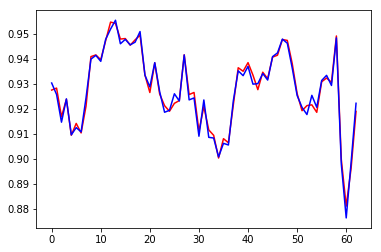

Cumulative return: 0.4950810274597924 | Profitability Performance: 0.8888888888888888 | MSE Loss: 0.00022693812444174455


In [19]:

for i in files:
    encoder=EncoderRNN().cuda()
    decoder = DecoderRNN().cuda()
    encoder_optimizer = optim.Adam(encoder.parameters())
    decoder_optimizer = optim.Adam(decoder.parameters())
    criterion=nn.MSELoss()
    
    
    checkpoint = torch.load(join(path,i))
    encoder.load_state_dict(checkpoint['encoder_state_dict'])
    decoder.load_state_dict(checkpoint['decoder_state_dict'])
    encoder_optimizer.load_state_dict(checkpoint['encoder_optimizer_state_dict'])
    decoder_optimizer.load_state_dict(checkpoint['decoder_optimizer_state_dict'])
    encoder.eval()
    decoder.eval()

    
    
    eval_loss,y_pred,y_true=evaluate(encoder,decoder, val_loader, criterion)
    pred_perf=pp(y_pred,y_true)
    daily_returns=cdr(y_pred,y_true)
    
    if (pred_perf>0.87 and daily_returns>0.49 and eval_loss<0.0003):
        plt.plot(range(len(y_pred)),y_pred,color='red')
        plt.plot(range(len(y_true)),y_true,color='blue')
        plt.show()
        print ('Cumulative return: {} | Profitability Performance: {} | MSE Loss: {}'.format(daily_returns, pred_perf, eval_loss))
    else:
        os.remove(join(path,i))

As a result of using a loop to iterate over each file name in the list of 'files', this code snippet performs a series of operations on OpenPrice models files.

Within each iteration, the code performs the following operations:
- It creates instances of the 'EncoderRNN' and 'DecoderRNN' classes and assigns them to 'encoder' and 'decoder' variables, respectively. When the '.cuda()' function is called, these instances are moved to the CUDA device for GPU acceleration. - The 'Adam' optimizer in the 'optim' module is used to initialize the optimizers for both encoder and decoder models. The 'MSELoss' class in the 'nn' module is used to initialize the mean squared error loss criterion. Using 'torch.load', a checkpoint is loaded from the file, which contains the saved states of the encoder, decoder, and optimizers. With the 'load_state_dict' method, state information is loaded into the encoder and decoder models and their optimizer objects. - The models are set into evaluation mode with the 'eval' method, which disables batch normalization and dropout. Using the encoder and decoder models on the validation data, the 'evaluate' function calculates the evaluation loss, predicted values, and true values. In the 'pp' function, predicted values are compared to the true values. Based on the predicted and true values, the 'cdr' function calculates the cumulative return. - When the calculated performance, profitability, and evaluation loss meet certain conditions, 'matplotlib.pyplot.plot' is used to plot the predicted values against the true values, and the cumulative return, profitability performance, and MSE loss are displayed. In summary, if the conditions are not met, the model file is removed using 'os.remove'. Analyzes and evaluates the OpenPrice models. According to specific conditions, it loads the model, evaluates its performance on validation data, computes various metrics, and decides whether to keep or remove the model.

In [13]:
len(y_pred)

63

This code snippet calculates the length of the 'y_pred' list or array. Predicted values are represented by the 'y_pred' object. It returns the number of elements in the 'y_pred' list or the length of the 'y_pred' array.

The length of 'y_pred' indicates the number of predicted values that have been generated or stored in the 'y_pred' variable.

A list or array is typically analyzed or processed according to the length of the predicted values using this code, allowing further analysis or processing.

In [14]:
len(y_true)

63

This code snippet calculates the length of the 'y_true' list or array. It applies the 'len' function to the 'y_true' object. 'y_true' returns either the number of elements in a list or the length of an array. The length of 'y_true' indicates how many true values have been generated or stored in it. This code is commonly used to determine the size or number of elements in a list or array, which allows for further analysis or processing based on the length of the true values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

This code imports several libraries and modules that are commonly used in data analysis, machine learning, and deep learning tasks.  - 'numpy' is imported as 'np' and provides support for efficient numerical computations and array operations. Pandas is imported as 'pd' and offers powerful data manipulation and analysis tools through its DataFrame and Series structures. Matplotlib.pyplot is imported as 'plt' and allows users to create plots and visualizations. - torch is This library is used to build and train neural networks using PyTorch, a popular open-source deep learning framework. - 'torch.nn' enables you to access neural network modules and classes. The import is 'torch.autograd', which enables the computation of gradients for backpropagation in neural network training using automatic differentiation. The import 'torch.optim' allows access to several optimization algorithms, including stochastic gradient descent (SGD), The model parameters are updated during training by importing 'torch.nn.functional' as 'F'. It provides additional functional operations that are commonly used in neural networks. PyTorch's utility functions and classes for handling datasets and loading data are imported with 'torch.utils.data'. To provide additional functionality for image transformations and utilities when working with computer vision tasks, the packages 'torchvision.transforms' and 'torchvision.utils' are imported. By importing these libraries and modules, the code sets up the necessary tools and functionalities to perform tasks such as data processing, model building, training, and visualization.

In [2]:
train_df=pd.read_csv('data/train.csv')
validation_df=pd.read_csv('data/validation.csv')
validation_df=pd.concat([train_df[-9:],validation_df])
validation_df=validation_df.reset_index(drop=True)
test_df=pd.read_csv('data/test.csv')
train_df.drop(['High price', 'Low Price', 'Date'],axis=1,inplace=True)
validation_df.drop(['High price', 'Low Price', 'Date'],axis=1,inplace=True)
test_df.drop(['High price', 'Low Price','Date'],axis=1,inplace=True)

In this code snippet, several data processing operations are performed using the pandas library. - It reads data from a CSV file named 'train.csv' located in the 'data' directory and assigns it to a DataFrame named 'train_df'. - It reads the data from a CSV file named 'validation.csv' located in the 'data' directory and assigns it to a DataFrame named 'validation_df'. The 'concat' function from pandas concatenates the last nine rows of the 'train_df' DataFrame with the 'validation_df' DataFrame. The resulting DataFrame is reassigned to 'validation_df'. The 'reset_index' function with the 'drop' parameter set to 'True' resets the index of the 'validation_df' DataFrame. This ensures that the index values of the DataFrame start at 0. - The data is read from a CSV file named 'test.csv' located in the 'data' directory and assigned to 'test_df'. - It drops the columns labeled 'High price', 'Low Price', and 'Date' from the 'train_df', 'validation_df', and 'test_df' DataFrames by using the 'drop' method with the 'axis' parameter set to 1 (columns) and the 'inplace' parameter set to 'true' parameter. In-place modifications are made to the DataFrames by removing the specified columns. This code reads data from CSV files into DataFrames, concatenates rows from the 'train_df' DataFrame with the 'validation_df' DataFrame, resets the index of the 'validation_df' DataFrame, and removes certain columns. In machine learning and data analysis, these operations are commonly used to preprocess and prepare data for training or evaluation.

In [3]:
class dataprep(Dataset):
    def __init__(self, dataframe):
        self.df=dataframe
    def __len__(self):
        return self.df.shape[0]-10
    def __getitem__(self,idx):
        if (idx+10<self.df.shape[0]):
            X=torch.from_numpy(self.df.drop('Closing Price',axis=1)[idx:idx+10].values)
            targets=torch.from_numpy(self.df['Closing Price'][idx:idx+9].values)
            y=torch.tensor([self.df['Closing Price'].loc[idx+9]])
            return ({'X':X, 'targets':targets, 'y': y})

This code snippet defines a custom class named 'dataprep' that inherits from the 'Dataset' class provided by the PyTorch library.

The 'dataprep' class is intended to preprocess and provide data samples for a machine learning or deep learning model.

- The '__init__' method initializes the 'dataprep' object with a DataFrame passed as the 'dataframe' parameter. It assigns the DataFrame to the 'self.df' attribute of the object. - The '__len__' method returns the length of the DataPrep object, which is the number of rows in the DataFrame ('self.df') minus 10. This implies that the object represents a dataset with samples, where each sample consists of 10 consecutive rows from the DataFrame. The '__getitem__' method retrieves an individual data sample based on its index ('idx'). In this case, it checks if the index plus 10 is less than the number of rows in the DataFrame. If true, it performs the following operations: Selects the rows from the DataFrame starting from 'idx' and spanning the next 10 rows (idx:idx+10) by using the drop method to exclude 'Closing Price'. The selected data is converted to a PyTorch tensor using 'torch.from_numpy' and assigned to 'X'. Using indexing, the 'Closing Price' values are selected from rows starting with 'idx'. The selected values are converted to a PyTorch tensor and assigned to 'targets'.   - It selects the 'Closing Price' value from the row at index 'idx+9', converts it to a PyTorch tensor wrapped in a list, and assigns it to 'y'.   The dictionary returns three key-value pairs: 'X' represents the tensor for the input data, 'targets' represents the target value tensor for the input data, and 'y' represents the predicted value tensors. In summary, this class provides a custom dataset DataFrame data is preprocessed into samples with input data, target values, and predicted values. Using PyTorch's 'Dataset' and 'DataLoader' functions, it can be used as input to a machine learning or deep learning model.

In [4]:
train_set=dataprep(dataframe=train_df)
validation_set=dataprep(dataframe=validation_df)
test_set=dataprep(dataframe=test_df)

This code snippet creates instances of the 'dataprep' class, which we assume has been defined earlier. It assigns an instance of the 'dataprep' class to the variable 'train_set'. It is initialized with the 'train_df' DataFrame as the 'dataframe' parameter, representing the training dataset. A second instance of the 'dataprep' class is created and assigned to the variable 'validation_set'. A third instance of the 'dataprep' class is created and assigned to the variable 'test_set'. It is initialized with the 'validation_df' DataFrame as the 'dataframe' parameter, representing the validation dataset. It is initialized with the 'test_df' DataFrame as the 'dataframe' parameter, representing the test dataset. Essentially, it creates instances of the 'dataprep' class for training, validation, and testing. For training or evaluation purposes, these instances encapsulate the data and provide the necessary methods for accessing and processing it.

In [9]:
for i in range(60,63):
    sample=validation_set[i]
    print (i,sample['X'].size(),sample['targets'].size(), sample['y'].size())

60 torch.Size([10, 16]) torch.Size([9]) torch.Size([1])
61 torch.Size([10, 16]) torch.Size([9]) torch.Size([1])
62 torch.Size([10, 16]) torch.Size([9]) torch.Size([1])


This code snippet performs a loop that iterates over a range of numbers from 60 to 62, inclusive.  Within each iteration of the loop: - It retrieves a sample from the 'validation_set' using the index of 'i'. Input data ('X'), target values ('targets'), and predicted value ('y') are stored in the 'sample' variable, which is like a dictionary. In the sample, it prints the value of 'i', the size of the 'X' tensor, Overall, this code loops over a specific range of indices and prints the size of the input data, target values, and predicted values tensors for each corresponding sample in the 'validation_set'. During development and debugging, it is commonly used to inspect and verify the shapes and sizes of data samples.

In [10]:
len(train_set)

870

This code snippet calculates the length of the 'train_set'. This represents an instance of the 'dataprep' class or a custom dataset. It returns the number of samples or elements in the 'train_set'. The length of 'train_set' indicates how many samples or data points are available. It reflects the number of rows or records in the original DataFrame used to create the 'train_set' instance. The length of a dataset is often used to determine further analysis or processing.

In [11]:
train_loader = DataLoader(train_set, batch_size=15, shuffle=True)
val_loader = DataLoader(validation_set, batch_size=1, shuffle=False)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

This code creates data loaders for the training, validation, and test datasets. A 'train_set' data loader is created using the PyTorch library's 'DataLoader' function. 'train_set' represents the dataset to be loaded as the first argument. 'batch_size' is set to 15, which indicates that data will be loaded in batches of 15 samples. The 'shuffle' parameter is set to 'True', which means that the samples within each batch will be shuffled randomly during the loading process. A data loader for the 'validation_set' is created and assigned to 'val_loader'. 'batch_size' is set to 1, indicating that the data will be loaded one sample at a time without batching. The 'shuffle' parameter is set to 'False', which means that the order of the samples will not be shuffled during loading. A separate data loader is created for 'test_set' and assigned to 'test_loader'. A 'batch_size' of 1 and 'shuffle' set to 'False' make it similar to the 'val_loader'. During the training, validation, and testing phases of machine learning or deep learning models, data loaders can be used to load and process data efficiently in mini-batches. Their capabilities include batch loading, shuffling, and parallelization, which can enhance the training process and improve computational efficiency.

In [12]:
class EncoderRNN(nn.Module):
    def __init__(self,encoder_input_size=16,encoder_hidden_size=64, time_steps=10):
        super(EncoderRNN,self).__init__()
        self.input_size=encoder_input_size
        #input_size=n
        self.hidden_size=encoder_hidden_size
        #hidden_size=1
        self.t_steps=time_steps
        #time_steps=10
        
        self.input_attention=nn.Linear(time_steps+encoder_hidden_size,1)
        self.rnn=nn.GRU(self.input_size, self.hidden_size)
        
    def forward(self,encoder_input,batch_size,hidden):
        #encoder_input:batch,T,n
        encoder_input=encoder_input.permute(0,2,1) #batch,n,T
        #print (encoder_input.size())
        #hidden=self.initHidden(batch_size) #hidden : 1,batch,hidden_size
        #print (hidden.size())
        encoded = torch.zeros(batch_size, self.t_steps, self.hidden_size,device=device) #encoded: 1,T,hidden_size
        #print(encoded.size())
        for t in range(self.t_steps):
            x=torch.cat((hidden.repeat(self.input_size,1,1).permute(1,0,2),encoder_input),dim=2)
            #print (x.size())
            #x:batch,n,T+hidden_size
            x=x.view(-1,self.t_steps+self.hidden_size)
            #print (x.size())
            #x:batch*n,T+hidden_size
            x=F.softmax((self.input_attention(x)).view(-1,self.input_size),dim=1)
            #print (x.size())
            #print(encoder_input[:,t,:].size())
            #x:batch,n
            x=torch.mul(x,encoder_input[:,:,t])
            #print (x.size())
            #x:1,n
            output, hidden=self.rnn(x.unsqueeze(0), hidden)
            #print (output.size(), hidden.size())
            encoded[:,t,:]=hidden
            #output,hidden:1,1,hidden
        return encoded
    
    def initHidden(self,batch_size):
        return torch.zeros(1, batch_size, self.hidden_size, device=device)

This code defines a neural network module called 'EncoderRNN' using the PyTorch framework. - The class inherits from the 'nn.Module' class, which is the base class for all neural network modules. An encoder recurrent neural network (RNN) is initialized by setting its parameters and layers. - The parameters 'encoder_input_size', 'encoder_hidden_size', and 'time_steps' determine the size of the input, the hidden state, and the number of time steps, respectively. A linear layer, 'input_attention', performs weighted attention on the hidden state and the input sequence. It computes attention scores for each input element based on the concatenation of the hidden state and input sequence. The 'rnn' instance is a GRU (Gated Recurrent Unit) class from the 'nn' module. It takes the input size and hidden size as arguments. The 'forward' method defines the encoder's forward pass. The encoder performs the following operations given input 'encoder_input', batch size 'batch_size', and initial hidden state 'hidden': - Transposes input tensor dimensions to batch size, input size, and time steps. - Initializes the 'encoded' tensor with zeros, representing the encoded output. For each step, iterates over the time steps and performs the following steps: - Concatenates the hidden state with the input tensor along the feature dimension. - Reshapes the tensor. It is designed to have a batch size, input size, time steps, and hidden size dimension. Softmax is used to obtain attention weights for input elements. - Takes the attention weights and multiplies them with the input elements. - Passes the resulting tensor through the RNN layer. - Stores the hidden state in 'encoded' tensor at each time step. Returns the encoded output. Initializes the 'encoded' tensor. This code defines an encoder neural network module with an attention mechanism, which takes input sequences and encodes them using recurrent layers. As a result, the model can capture important information from the input sequence and pass it on to the subsequent layers for further processing.

In [13]:
class DecoderRNN(nn.Module):
    def __init__(self,decoder_hidden_size=64,encoder_hidden_size=64,decoder_input_size=1, time_steps=10):
        super(DecoderRNN,self).__init__()
        self.decoder_hidden_size=decoder_hidden_size
        self.encoder_hidden_size=encoder_hidden_size
        self.decoder_input_size=decoder_input_size
        self.t_steps=time_steps
        
        self.temporal_attention=nn.Linear(decoder_hidden_size+encoder_hidden_size, 1)
        self.rnn=nn.GRU(decoder_input_size,decoder_hidden_size)
        self.fc1 = nn.Linear(encoder_hidden_size + 1, 1)
        self.fc2 = nn.Linear(decoder_hidden_size + encoder_hidden_size, 1)
        
    def forward(self,encoded,y_history,batch_size,hidden):
        #encoded: batch,T,hidden_size
        #print (encoded.size())
        
        #y_history: batch,T-1
        #hidden=self.initHidden(batch_size) #hidden:1,batch,hidden_size
        #print (hidden.size())
        for t in range(self.t_steps):
            x=torch.cat((hidden.repeat(self.t_steps,1,1).permute(1,0,2), encoded), dim=2) 
            #x:batch,T,enc_hidden_size+dec_hidden_size
            x=F.softmax(self.temporal_attention(x.view(-1,self.decoder_hidden_size+self.encoder_hidden_size)).view(-1,self.t_steps), dim=1)
            #x:batch,T
            x=torch.bmm(x.unsqueeze(1), encoded)[:,0,:]
            #x:batch,hidden_size
            if (t < self.t_steps-1):
                y_tilda=self.fc1(torch.cat((x, y_history[:, t].unsqueeze(1)), dim=1))
                output, hidden=self.rnn(y_tilda.unsqueeze(0), hidden)
        y_pred=self.fc2(torch.cat((hidden[0], x), dim = 1))
            
        return y_pred
                
        
    def initHidden(self,batch_size):
        return torch.zeros(1, batch_size, self.decoder_hidden_size, device=device)
    

This code defines a neural network module called 'DecoderRNN' using the PyTorch framework. - The class inherits from the 'nn.Module' class, which is the base class for all neural network modules. During this step, the decoder recurrent neural network's parameters and layers are initialized. - The 'decoder_hidden_size', 'encoder_hidden_size', 'decoder_input_size', and 'time_steps' parameters are set as the sizes of the hidden state in the decoder, the hidden state in the encoder, the input size of the decoder, and the number of time steps, respectively. 'temporal_attention' is a linear layer that performs a weighted attention mechanism. It computes attention scores for each time step based on the concatenation of the hidden state and encoded output. The 'rnn' class represents the decoder's core recurrent layer, a GRU (Gated Recurrent Unit). It takes the input size and hidden size as arguments. - The 'fc1' and 'fc2' are linear layers that transform the concatenated hidden state and input sequence into the desired output size. - The 'forward' method defines the forward pass. Using the encoded output 'encoded', the previous target values 'y_history', the batch size 'batch_size', and the initial hidden state 'hidden', it performs the following functions: - Iterates over the time steps and performs the following steps for each step: - Concatenates the hidden state with the encoded output along the feature dimension. - Computes the weighted sum of the encoded output using the softmax function. Weights for attention. - If not at the last time step, concatenate the resulting tensor with the corresponding target value from 'y_history' and pass it through the RNN layer. - Concatenates the final hidden state with the weighted sum of the encoded output. To obtain the predicted output, the concatenated tensor is passed through the linear layer 'fc2'. InitHidden initializes the hidden state tensor with zeros. As a result, this code defines a neural network module for decoding. Predicted output is produced using encoded output and previous target values as inputs. Through the attention mechanism, the model is able to dynamically attend to different time steps in the encoded sequence and generate accurate predictions.

In [14]:
def train(encoder,decoder,encoder_optimizer, decoder_optimizer, train_loader, loss_criterion, rl, num_epochs, epoch, epochs):
    running_loss=0
    for i, sample in enumerate(train_loader):
        x=Variable(sample['X'].type(torch.cuda.FloatTensor))
        y=Variable(sample['targets'].type(torch.cuda.FloatTensor))
        y_true=Variable(sample['y'].type(torch.cuda.FloatTensor))
        
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        
        hidden=encoder.initHidden(15)
        encoded=encoder(x,15,hidden)
        hidden=decoder.initHidden(15)
        y_pred=decoder(encoded,y,15,hidden)
        
        loss=loss_criterion(y_pred,y_true)
        running_loss+=loss.item()
        rl.append(loss.item())
        
        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()
        
    print('Epoch: {}/{} | Loss: {}'.format(epoch-epochs+1, num_epochs, running_loss))
            

The encoder-decoder model is trained using a function named 'train' in this code. - The function takes several inputs: 'encoder' and 'decoder' are encoder and decoder neural network models, 'encoder_optimizer' and 'decoder_optimizer' are optimizer objects for updating the model parameters, 'train_loader' is the data loader for the training dataset, 'loss_criterion' is the loss function used to compute the training loss, 'rl' is a list to store the There are three variables in this example: 'num_epochs' is the total number of epochs, 'epoch' is the current epoch number, and 'epochs' is the number of previous epochs. The 'running_loss' variable is initialized to keep track of the cumulative loss during training. To retrieve the index and sample, the function iterates over the training data loader using 'enumerate'. By analyzing the sample, the input 'x', the target 'y', and the true value 'y_true', it converts them into PyTorch variables. - The optimizer gradients are set to zero by using the 'zero_grad' method for both encoder and decoder. - The initial hidden state is obtained from the encoder using the 'initHidden' method with a batch size of 15. - The input 'x' is passed through the encoder to obtain the encoded output. - Decoded output is passed through the decoder using the 'initHidden' method. - The encoded output and target 'y' are passed through the decoder to obtain In order to calculate the training loss, the 'running_loss' variable is added to the 'rl' list. Using the loss criterion, 'y_pred' and 'y_true' are compared. Gradients are computed by calling the 'backward' method on the loss. - The optimizer updates the model parameters with 'step'. The current epoch, total number of epochs, and running loss are printed by the function.

In [15]:
def pp(y_pred,y_true):
    r=0
    for t in range(0,len(y_pred)-1):
        if((y_pred[t+1]>=y_pred[t] and y_true[t+1]>=y_true[t]) or (y_pred[t+1]<y_pred[t] and y_true[t+1]<y_true[t])):
            r=r+1
    return r/len(y_pred)

An array or list containing predicted values and true values is defined in this code as 'pp', which calculates the performance percentage of predicted values. - It takes two inputs: 'y_pred' contains the predicted values, and 'y_true' contains the true values. In order to keep track of how many trends were correctly predicted, a variable called 'r' is initialized. - Iterates over all indices from 0 to 'y_pred' minus one. - For each index 't', it checks whether the - If the predicted value at index 't+1' is greater than or equal to the predicted value at index 't' and the true value at index 't+1' is greater than or equal to the true value at index 't', or - If the predicted value at index 't+1' is less than the predicted value at index 't' and the true value at index 't+1' is less than the true value at index 't'. Once the condition is met, it increments the count 'r' by one. Finally, it returns the ratio of 'r'. This function calculates the percentage of correctly predicted trends based on the comparison of predicted values with the corresponding true values, divided by the length of 'y_pred'. A model's ability to capture the direction of price movements accurately is measured by this parameter.

In [16]:
def evaluate(encoder,decoder, val_loader, loss_criterion, num_epochs, epoch, epochs):
    eval_loss=0
    y_predicted=[]
    y_actual=[]
    with torch.no_grad():
        for i,sample in enumerate(val_loader):
            x=sample['X'].type(torch.cuda.FloatTensor)
            y=sample['targets'].type(torch.cuda.FloatTensor)
            y_true=sample['y'].type(torch.cuda.FloatTensor)
            
            hidden=encoder.initHidden(1)
            encoded=encoder(x,1,hidden)
            hidden=decoder.initHidden(1)
            y_pred=decoder(encoded,y,1,hidden)
        
            loss=loss_criterion(y_pred,y_true)
            eval_loss+=loss.item()
            y_predicted.append(y_pred.item())
            y_actual.append(y_true.item())
            
        pred_perf=pp(y_predicted, y_actual)
    print('Epoch: {}/{} | Evaluation_Loss: {} | Pred. Power: {}'.format(epoch-epochs+1, num_epochs, eval_loss, pred_perf))        
    plt.plot(range(len(y_predicted)),y_predicted,color='red')
    plt.plot(range(len(y_actual)),y_actual,color='blue')
    #print(len(y_predicted),len(y_actual))
    plt.show()
    
    
    return eval_loss,pred_perf

An evaluation of the encoder-decoder model is performed by the function 'evaluate' in this code. - The function takes several inputs: 'encoder' and 'decoder' are the encoder and decoder neural network models, 'val_loader' is the data loader for the validation dataset, 'loss_criterion' is the loss function used to calculate the evaluation loss, 'num_epochs' represents the total number of epochs, 'epoch' is the current epoch, and 'epochs' represents the number of previous epochs - It initializes the evaluation loss 'eval_loss' to keep track of the cumulative loss during evaluation. - It also initializes two lists, 'y_predicted' and 'y_actual', to store the predicted and actual values. To disable gradient computation during evaluation, a context manager 'with torch.no_grad():' is used to perform the evaluation. - To obtain the index and data sample, it iterates through the validation data loader using the 'enumerate' function. The 'y_target' and 'y_true' are extracted from the sample and converted to PyTorch tensors by the encoder using the 'initHidden' method with batch size 1. - The initial hidden state for the encoder is obtained by passing the input 'x' through the encoder. - The initial hidden state for the decoder is determined by using the 'initHidden' method with a batch size of 1. - The encoded output and target 'y' are passed through the decoder to obtain the predicted output. Evaluation loss is calculated by comparing 'y_pred' with 'y_true' using the loss criterion. Evaluation loss is added to the 'eval_loss' variable. - The predicted and actual values are added to their respective lists. By calling the 'pp' function on the predicted and actual values, the performance percentage is calculated. - It prints out the current epoch, total number of epochs, evaluation loss, and performance percentage. - It plots the predicted and actual values. - Finally, it returns the evaluation loss and performance percentage using Matplotlib.

In [17]:
encoder=EncoderRNN().cuda()
decoder = DecoderRNN().cuda()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

The code creates instances of the EncoderRNN and DecoderRNN classes and assigns them to the variables 'encoder' and 'decoder', respectively. 

- The 'EncoderRNN' and 'DecoderRNN' objects are initialized without any arguments, which will use the default values specified in their respective class definitions. If the GPU is available, the '.cuda()' method is called on both objects. This allows for faster computation using GPU resources. If GPU resources are available, the 'device' variable is set to "cuda", otherwise to "cpu". Using this information, the model and tensors can be placed properly on the available device for computation later in the code. Based on the availability of GPU resources, this code configures the encoder and decoder models for training and evaluation on either a GPU or CPU device.

In [18]:
encoder_optimizer = optim.Adam(encoder.parameters())
decoder_optimizer = optim.Adam(decoder.parameters())
criterion=nn.MSELoss()

This code initializes the optimizer objects for the encoder and decoder models, as well as the loss criterion. The 'optim.Adam' function creates an Adam optimizer for updating encoder parameters. As an input, 'encoder.parameters()' retrieves the encoder model parameters that need to be optimized. - The same is done for the decoder model, creating an Adam optimizer for updating its parameters using 'decoder.parameters()'. In order to create the mean squared error (MSE) loss criteria, the function nn.MSELoss() is used. The mean squared difference between predicted and target values is measured using this criterion. As part of the training and evaluation process, it will be used to calculate the loss. Overall, this code sets up the optimizer objects for the encoder and decoder models using the Adam optimization algorithm and initializes the MSE loss criterion to evaluate the models' performance.

In [ ]:
rl=[]
num_epochs=2000
epochs=0
for epoch in range(epochs,epochs+num_epochs):
    train(encoder,decoder,encoder_optimizer, decoder_optimizer,train_loader,criterion,rl,num_epochs, epoch, epochs)
    eval_loss, pred_perf=evaluate(encoder,decoder, val_loader, criterion, num_epochs, epoch, epochs)
    if (eval_loss<0.01 and pred_perf>0.5):
        print ('%---Saving the model---%')
        torch.save({
            'epoch': epoch+1,
            'encoder_state_dict': encoder.state_dict(),
            'decoder_state_dict': decoder.state_dict(),
            'encoder_optimizer_state_dict': encoder_optimizer.state_dict(),
            'decoder_optimizer_state_dict': decoder_optimizer.state_dict(),
            'loss': rl,
            },'models/OpenPrice/model_{}.pth'.format(epoch+1))
    

For a specified number of epochs, this code performs a training and evaluation loop. - An empty list 'rl' is initialized to store the loss values during training. - 'num_epochs' is set to the total number of epochs required to train the models. The starting epoch is set at 0, and the loop iterates over each epoch up to 'epochs + num_epochs'. - The 'train' function is called inside the loop. Using the provided data and optimizer objects, build models. The function updates the models' parameters, computes the loss, and appends the loss value to the 'rl' list. It then evaluates the trained models on the validation data. By using the 'torch.save' function, the trained models and optimizer states are saved as a checkpoint when the evaluation loss is less than 0.01 and the prediction performance is greater than 0.5. In addition to the epoch number, the checkpoint contains the state dictionaries of the encoder and decoder models, the state dictionaries of the optimizer objects, and the list of loss values. Model_[].pth is the name of the saved checkpoint. The loop continues until all epochs have been completed, replacing [] with the current epoch number. In general, this code performs training and evaluation for a specific number of epochs, tracks the loss values during training, and saves the models at specific checkpoints.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

There are several libraries used in this code: numpy for numerical operations, pandas for data manipulation, matplotlib.pyplot for data visualization, and sklearn for machine learning. Specifically, it imports the `MinMaxScaler` class from the `sklearn.preprocessing` module. The code makes use of these libraries by importing them. For example, `numpy` provides efficient numerical operations, `pandas` allows for easy handling and analysis of data in tabular format, `matplotlib.pyplot` enables creating various types of plots and charts, and `sklearn` provides a wide range of machine learning algorithms and preprocessing techniques.

The `MinMaxScaler` class from `sklearn.preprocessing` is particularly useful for scaling numerical data to a specific range, typically between 0 and 1. It is commonly used as a preprocessing step in machine learning pipelines to normalize the input features. The code sets up the necessary libraries and functionalities for data manipulation, visualization, and machine learning.

In [3]:
train=pd.read_csv('data/train.csv')
validation=pd.read_csv('data/validation.csv')
test=pd.read_csv('data/test.csv')

Three CSV files are read in this code: 'train.csv', 'validation.csv', and 'test.csv'. Each file contains tabular data in comma-separated values (CSV) format. The code loads the data from each file into a separate data frame using pd.read_csv(). Each data frame represents a table-like structure where the data is organized into rows and columns. It is likely that the 'train.csv' file contains training data. Validation.csv contains a separate set of data used to evaluate the model's performance during training and tune its hyperparameters. The 'test.csv' file typically represents unseen data that will be used to assess the final performance of the trained model. The code reads these CSV files and makes them available for further analysis and preprocessing. By using the pandas library, the data can be accessed and manipulated.

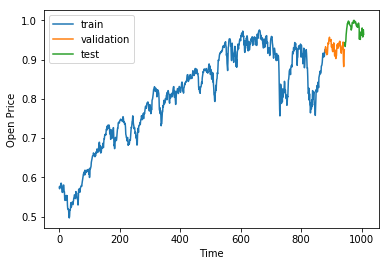

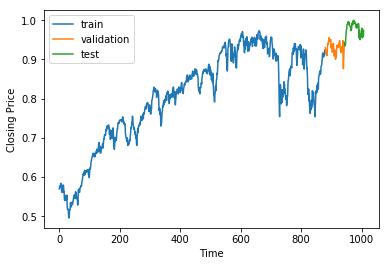

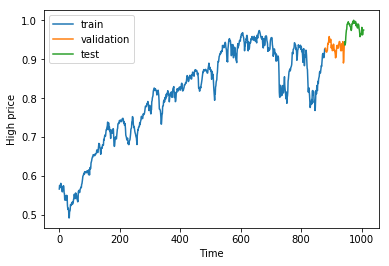

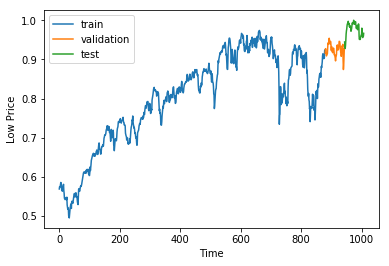

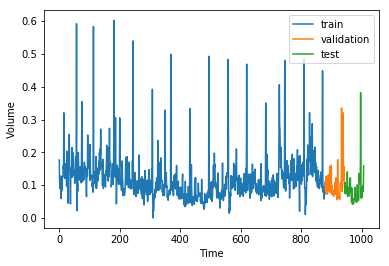

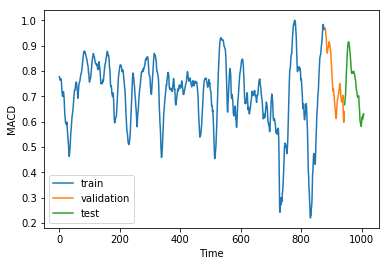

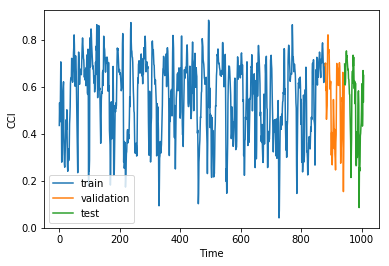

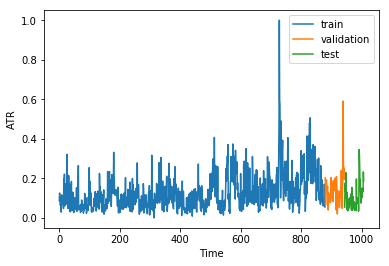

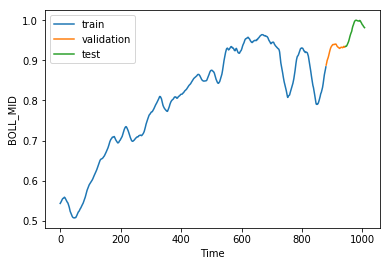

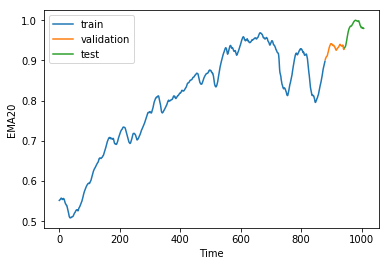

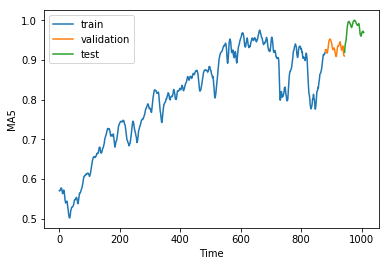

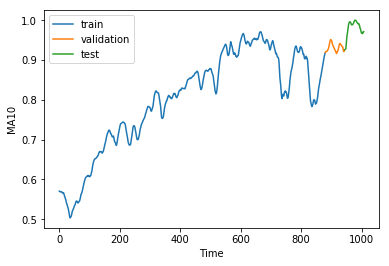

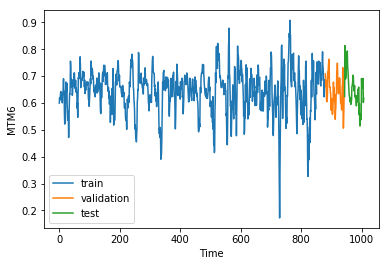

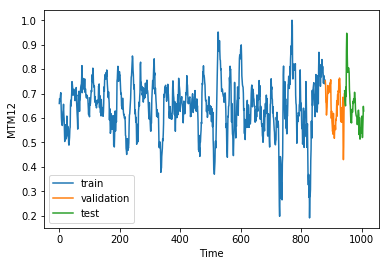

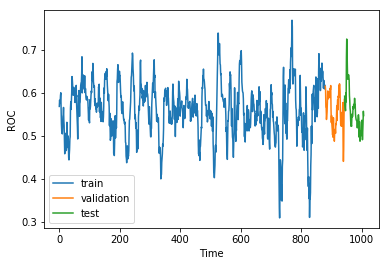

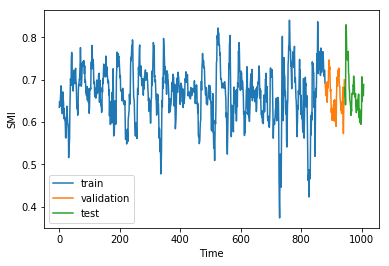

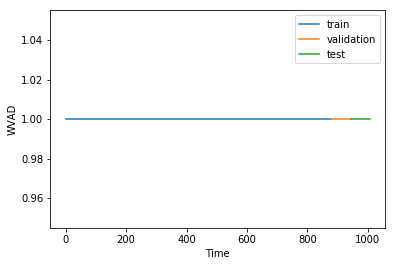

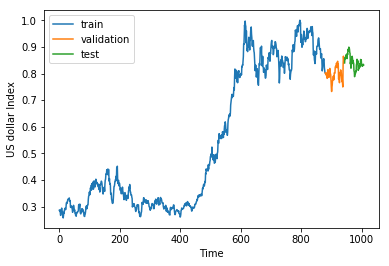

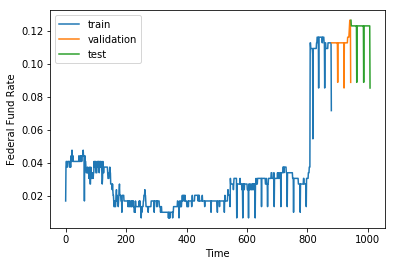

In [4]:
for i in train.columns:
    if (i!='Date'):
        a=train[i].values
        b=validation[i].values
        c=test[i].values
        plt.plot(range(len(a)),a, label='train')
        plt.plot(range(len(a),len(b)+len(a)),b, label='validation')
        plt.plot(range(len(a)+len(b),len(a)+len(b)+len(c)),c, label='test')
        plt.ylabel(i)
        plt.xlabel('Time')
        plt.legend()
        plt.show()

In this code, line plots are generated for the `train`, `validation`, and `test` data frames. It loops through the columns of the `train` data frame and plots the corresponding data for each column. It checks each column for the value 'Date'. This condition ensures that the 'Date' column is excluded from the plots since it is not meant to be visualized as a data series.

The code then extracts the values from the `train`, `validation`, and `test` data frames for the current column, storing them in variables `a`, `b`, and `c`, respectively.

Using the `plt.plot()` function from the `matplotlib.pyplot` library, the code plots the data points for the `train` data set with a label 'train'. It then plots the data points for the `validation` data set with a label 'validation', and the data points for the `test` data set with a label 'test'. In the plot, the y-axis is labeled with the column name, and the x-axis is labeled with time. The `plt.ylabel()` and `plt.xlabel()` functions are used to set the corresponding labels.

Finally, the `plt.legend()` function is called to display a legend indicating which line corresponds to which data set. Plots are displayed using the plot.show() function. Throughout the train data frame, this process is repeated for each column, resulting in multiple plots that show the patterns and trends in the data over time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import os
from os import listdir
from os.path import isfile, join

This code is importing various libraries and modules needed for data manipulation, visualization, and deep learning using PyTorch.  - `numpy` is a library for numerical computing in Python. - `pandas` is a library for data manipulation and analysis. - `matplotlib.pyplot` is a plotting library for creating visualizations. - `torch` is a machine learning library that provides data structures and algorithms for deep learning. - `torch.nn` provides classes for defining and training neural networks. - `torch.autograd` provides classes and functions for automatic differentiation, a key component in training neural networks. - `torch.optim` provides optimization algorithms for updating the parameters of neural networks. - `torch.nn.functional` contains functions that are used in neural network layers and loss functions. - `torch.utils.data` provides tools for data loading and processing in PyTorch. - `os` provides a way to interact with the operating system, such as accessing files and By importing these libraries and modules, the code allows the subsequent code to access their functionality and classes. This includes listdir and isfile functions from the OS module.

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Code identifies the device on which the code will be executed, either "cuda" (GPU) or "cpu" (CPU). The device is set to "cuda" if a CUDA-enabled GPU is available. In any other case, it sets the device to "cpu". In deep learning models, device selection is crucial for optimizing the performance of computations and utilizing the available hardware resources.

In [3]:
train_df=pd.read_csv('data/train.csv')
validation_df=pd.read_csv('data/validation.csv')
validation_df=pd.concat([train_df[-9:],validation_df])
validation_df=validation_df.reset_index(drop=True)
test_df=pd.read_csv('data/test.csv')
train_df.drop(['High price', 'Low Price', 'Date'],axis=1,inplace=True)
validation_df.drop(['High price', 'Low Price', 'Date'],axis=1,inplace=True)
test_df.drop(['High price', 'Low Price','Date'],axis=1,inplace=True)

The following code reads data from CSV files into Pandas DataFrames. DataFrame "train_df" contains the training data read from the file "train.csv". The DataFrame "validation_df" stores the validation data from the file "validation.csv". It also reads the test data from the file "test.csv" and stores it in the DataFrame "test_df". It then preprocesses the data. In these DataFrames, 'High price', 'Low price', and 'Date' columns are deleted using the drop() method with the specified column names and axis=1 setting. This operation removes these columns from the DataFrames in-place. Then, it concatenates the last 9 rows of "train_df" with "validation_df" using the concat() function. In the "validation_df" DataFrame, the result is stored. When there is some overlap between the validation and training data, this concatenation is useful. The `concat()` function appends the rows from "train_df" to the beginning of "validation_df". Lastly, the code resets the index of "validation_df" DataFrame using the `reset_index()` method with `drop=True`. By performing this operation, the old default index is discarded and a new default index is created. After concatenation, it ensures that the index values are consecutive and consistent.

In [4]:
class dataprep(Dataset):
    def __init__(self, dataframe):
        self.df=dataframe
    def __len__(self):
        return self.df.shape[0]-10
    def __getitem__(self,idx):
        if (idx+10<self.df.shape[0]):
            X=torch.from_numpy(self.df.drop('Closing Price',axis=1)[idx:idx+10].values)
            targets=torch.from_numpy(self.df['Closing Price'][idx:idx+9].values)
            y=torch.tensor([self.df['Closing Price'].loc[idx+9]])
            return ({'X':X, 'targets':targets, 'y': y})

Dataprep is a subclass of PyTorch's "Dataset" class defined in this code. The "Dataset" class is a base class for creating datasets in PyTorch. It has three main methods: "__init__", "__len__", and "__getitem__". Its constructor is "__init__". It takes a DataFrame as input and assigns it to the instance variable "df" for later use. The "__len__" method returns the dataset length. This method returns the number of rows in the DataFrame minus 10. This implies that the dataset will exclude the last 10 rows of the DataFrame. The "__getitem__" method is used to retrieve an item from the dataset. Input is an index "idx". If the index plus 10 is less than the number of rows in the DataFrame, it performs the following steps: - It selects a subset of the DataFrame by slicing from "idx" to "idx+10" (exclusive) and drops the 'Closing Price' column from this subset using the `drop()` method with `axis=1`. - It converts the selected subset to a PyTorch tensor using the `torch.from_numpy()` function and assigns it to the variable "X". - It selects another subset of the 'Closing Price' column from "idx" to "idx+9" This function selects a single value from the 'Closing Price' column at the index "idx+9" and converts it to a PyTorch tensor with a shape of (1,) using the torch.tensor() function. This value represents the target value at the next time step. - It returns a dictionary containing the tensors "X", "targets", and "y" as the item at the given index. Overall, this "dataprep" class is designed to prepare the data in a specific format for training. At each index, it provides access to input data "X", target values "targets" (corresponding to the previous 9 time steps), and single-step target values "y".

In [5]:
train_set=dataprep(dataframe=train_df)
validation_set=dataprep(dataframe=validation_df)
test_set=dataprep(dataframe=test_df)

In this code, three instances of the "dataprep" class are created: "train_set", "validation_set", and "test_set". Each instance is initialized with a different DataFrame: "train_df", "validation_df", and "test_df", respectively. These instances are used to prepare datasets for training, validation, and testing. By instantiating the "dataprep" class with the corresponding DataFrame, each dataset is created with the necessary data and structure defined by the class.

The data loaders will be created and fed to a model for training or evaluation using these datasets in subsequent steps of the machine learning pipeline. Machine learning algorithms can easily access and process data stored in "dataprep" instances.

In [6]:
train_loader = DataLoader(train_set, batch_size=15, shuffle=True)
val_loader = DataLoader(validation_set, batch_size=1, shuffle=False)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

The code creates three data loaders: "train_loader", "val_loader", and "test_loader". 

During training, validation, or testing, data loaders provide an efficient way to load and iterate over datasets. They handle tasks such as batching, shuffling, and parallel data loading, which are common operations in machine learning workflows. "train_loader" is created by using "train_set" from the "dataprep" class. It loads the training data in batches of 15 samples, and the order of the samples is shuffled randomly with each epoch. The "val_loader" is created with the "validation_set" instance. Each sample is treated as a separate batch when loading validation data. The order of the samples is not shuffled, ensuring that the data is presented in the same order during evaluation. The "test_loader" uses the "test_set" instance of "dataprep". Individual batches of size 1 are loaded into the test data without rearranging the samples. By providing an interface to access and iterate over the datasets in a structured and optimized manner, these data loaders facilitate the efficient processing of the data during training, validation, and testing.

In [7]:
class EncoderRNN(nn.Module):
    def __init__(self,encoder_input_size=16,encoder_hidden_size=64, time_steps=10):
        super(EncoderRNN,self).__init__()
        self.input_size=encoder_input_size
        #input_size=n
        self.hidden_size=encoder_hidden_size
        #hidden_size=1
        self.t_steps=time_steps
        #time_steps=10
        
        self.input_attention=nn.Linear(time_steps+encoder_hidden_size,1)
        self.rnn=nn.GRU(self.input_size, self.hidden_size)
        
    def forward(self,encoder_input,batch_size):
        #encoder_input:batch,T,n
        encoder_input=encoder_input.permute(0,2,1) #batch,n,T
        #print (encoder_input.size())
        hidden=self.initHidden(batch_size) #hidden : 1,batch,hidden_size
        #print (hidden.size())
        encoded = torch.zeros(batch_size, self.t_steps, self.hidden_size,device=device) #encoded: 1,T,hidden_size
        #print(encoded.size())
        for t in range(self.t_steps):
            x=torch.cat((hidden.repeat(self.input_size,1,1).permute(1,0,2),encoder_input),dim=2)
            #print (x.size())
            #x:batch,n,T+hidden_size
            x=x.view(-1,self.t_steps+self.hidden_size)
            #print (x.size())
            #x:batch*n,T+hidden_size
            x=F.softmax((self.input_attention(x)).view(-1,self.input_size),dim=1)
            #print (x.size())
            #print(encoder_input[:,t,:].size())
            #x:batch,n
            x=torch.mul(x,encoder_input[:,:,t])
            #print (x.size())
            #x:1,n
            output, hidden=self.rnn(x.unsqueeze(0), hidden)
            #print (output.size(), hidden.size())
            encoded[:,t,:]=hidden
            #output,hidden:1,1,hidden
        return encoded
    
    def initHidden(self,batch_size):
        return torch.zeros(1, batch_size, self.hidden_size, device=device)

The code defines a class called "EncoderRNN" that is a subclass of "nn.Module" in PyTorch. In this class, there are three main components: an initialization method, a forward method, and an initialization of the hidden state. The "EncoderRNN" class represents a recurrent neural network model with encoders. In the initialization method, the class sets the values of the input size, hidden size, and time steps based on the arguments provided or default values. It also initializes two modules: an input attention linear layer and a GRU (Gated Recurrent Unit) layer. It inputs an encoder input tensor and a batch size. An encoder input is reshaped to have batch size, input size, and time step dimensions. A hidden state is then initialized using the "initHidden" method. A tensor called "encoded" is created with zeros, with dimensions of batch size, time steps, and hidden size. In the for loop, the input tensor is concatenated with the repeated hidden state, and the result is passed through the input attention layer. An element-wise multiplication of the encoder input tensor is performed with the softmax function applied to the output. Once the tensor has been processed, it is passed through the GRU layer, which produces an output and a new hidden state. At each time step, the hidden state is stored in the "encoded" tensor. Finally, "initHidden" initializes the hidden state tensor with zeros, with dimensions of 1, batch size, and hidden size. The encoder RNN model entails the architecture and forward computation of generating hidden states by processing input sequences.

In [8]:
class DecoderRNN(nn.Module):
    def __init__(self,decoder_hidden_size=64,encoder_hidden_size=64,decoder_input_size=1, time_steps=10):
        super(DecoderRNN,self).__init__()
        self.decoder_hidden_size=decoder_hidden_size
        self.encoder_hidden_size=encoder_hidden_size
        self.decoder_input_size=decoder_input_size
        self.t_steps=time_steps
        
        self.temporal_attention=nn.Linear(decoder_hidden_size+encoder_hidden_size, 1)
        self.rnn=nn.GRU(decoder_input_size,decoder_hidden_size)
        self.fc1 = nn.Linear(encoder_hidden_size + 1, 1)
        self.fc2 = nn.Linear(decoder_hidden_size + encoder_hidden_size, 1)
        
    def forward(self,encoded,y_history,batch_size):
        #encoded: batch,T,hidden_size
        #print (encoded.size())
        
        #y_history: batch,T-1
        hidden=self.initHidden(batch_size) #hidden:1,batch,hidden_size
        #print (hidden.size())
        for t in range(self.t_steps):
            x=torch.cat((hidden.repeat(self.t_steps,1,1).permute(1,0,2), encoded), dim=2) 
            #x:batch,T,enc_hidden_size+dec_hidden_size
            x=F.softmax(self.temporal_attention(x.view(-1,self.decoder_hidden_size+self.encoder_hidden_size)).view(-1,self.t_steps), dim=1)
            #x:batch,T
            x=torch.bmm(x.unsqueeze(1), encoded)[:,0,:]
            #x:batch,hidden_size
            if (t < self.t_steps-1):
                y_tilda=self.fc1(torch.cat((x, y_history[:, t].unsqueeze(1)), dim=1))
                output, hidden=self.rnn(y_tilda.unsqueeze(0), hidden)
        y_pred=self.fc2(torch.cat((hidden[0], x), dim = 1))
            
        return y_pred
                
        
    def initHidden(self,batch_size):
        return torch.zeros(1, batch_size, self.decoder_hidden_size, device=device)
    

In PyTorch, "DecoderRNN" is a subclass of the "nn.Module" class. DecoderRNN is a class that represents a decoder recurrent neural network model. The class consists of three main components: an initialization method, a forward method, and a hidden state initialization. Based on arguments or defaults, the class sets the values for the decoder hidden size, encoder hidden size, decoder input size, and time steps in the initialization method. It also initializes several modules: a temporal attention linear layer, a GRU layer, and two fully connected linear layers. Forward takes an encoded tensor, a history of previous outputs (y_history), and a batch size. The encoded tensor represents the output of the encoder RNN, and it has batch size, time step, and hidden size dimensions. The y_history tensor represents the previous outputs of the decoder, and it has dimensions of batch size and time steps - 1. The hidden state is initialized using the "initHidden" method inside the for loop. Through the temporal attention layer, the encoded tensor is concatenated with the repeated hidden state. For each time step, the softmax function is applied to the output, resulting in weights. A context vector is generated by performing a weighted sum of the encoded tensor. 

Concatenation of the context vector and the corresponding entry from y_history occurs if the current time step is less than t_steps-1. Following the output of this layer, the GRU layer produces an output and a new hidden state. Following the for loop, the hidden state and context vector (x) are concatenated and passed through the second fully connected layer, creating the predicted output (y_pred). Lastly, the "initHidden" method initializes the hidden state tensor with zeros with dimensions of 1, batch size, and decoder hidden size.  In summary, this class defines the architecture and forward computation of a An encoder RNN model that produces a sequence of predicted outputs based on the encoded sequence as input.

In [9]:
def test(encoder,decoder, test_loader, loss_criterion):
    eval_loss=0
    y_predicted=[]
    y_actual=[]
    with torch.no_grad():
        for i,sample in enumerate(test_loader):
            x=Variable(sample['X'].type(torch.cuda.FloatTensor))
            y=Variable(sample['targets'].type(torch.cuda.FloatTensor))
            y_true=Variable(sample['y'].type(torch.cuda.FloatTensor))
            encoded=encoder(x,1)
            y_pred=decoder(encoded,y,1)
        
            loss=loss_criterion(y_pred,y_true)
            eval_loss+=loss.item()
            y_predicted.append(y_pred.item())
            y_actual.append(y_true.item())
    
    return eval_loss, y_predicted, y_actual

The code defines a function called "test" that takes an encoder, decoder, test data loader, and loss criteria as inputs. It is used to evaluate the performance of the trained encoder and decoder models on the test dataset. Variables are initialized to track the evaluation loss, predicted values, and actual values. The evaluation loss represents the cumulative loss of the predictions compared to the true values. A loop is used to iterate over the samples in the test data loader. Torch variables are then created by extracting input features (x), target values (y), and true values (y_true) for each sample. By calling the encoder function with the input features and a batch size of 1, the encoder function is then used to obtain the encoded representation of the input features. The decoder then predicts the output sequence based on both the encoded representation and the target values. Calling the decoder function with the encoded representation, target values, and batch size of 1 results in predicted values (y_pred). Using a specified loss criterion, the cumulative evaluation loss is calculated based on the predicted values and true values. As a final step, the evaluation loss, predicted values, and true values are added to their respective lists. Finally, the "test" returns the evaluation loss, predicted values, and true values. This function evaluates the encoder and decoder models on the test dataset by computing the evaluation loss and collecting the predicted and true values.

In [10]:
def pp(y_pred,y_true):
    r=0
    for t in range(0,len(y_pred)-1):
        if((y_pred[t+1]>y_pred[t] and y_true[t+1]>y_true[t]) or (y_pred[t+1]<y_pred[t] and y_true[t+1]<y_true[t])):
            r=r+1
    return r/len(y_pred)

The code defines a function called "pp" that accepts predicted values (y_pred) and true values (y_true). By comparing predicted and true values, the function determines if there is an upward or downward trend in profitability performance. To keep track of the number of occurrences where the predicted and true values follow a consistent trend, the function initializes a variable "r". A range of indices from 0 to len(y_pred)-1 is iterated over. For each index, the function checks if the next predicted value (y_pred[t+1]) is greater than the current predicted value (y_pred[t]) and the next true value (y_true[t]]) is greater than the current true value. Alternatively, it checks whether the next prediction value is lower than the current prediction value and the next true value is lower than the current true value. The variable "r" is incremented by 1 if either of these conditions is met (either both increasing or both decreasing).

Finally, the function returns the ratio of "r" divided by the length of the predicted values (len(y_pred)). An indicator of profitability performance is the proportion of times the predicted and true values showed consistent trends.

In [11]:
def cdr(y_pred,y_true):
    r=0
    num_stocks=0
    B=0.0025
    S=0.0045
    for t in range(0,len(y_pred)-1):
        if(y_pred[t+1]>y_pred[t]):
            num_stocks+=1
            a=y_true[t+1]
            b=y_true[t]
            r=r+((a-b+b*B+a*S)/b)
        elif(y_pred[t+1]>y_pred[t] and num_stocks>0):
            num_stocks=0
            a=y_true[t+1]
            b=y_true[t]
            r=r+((b-a+a*B+b*S)/b)
    return r

The code defines a function called "cdr" that accepts predicted values (y_pred) and true values (y_true). The function calculates the cumulative daily return (cdr) based on a trading strategy. Variables "r" and "num_stocks" are initialized to zero, and constants B and S are assigned values. It then iterates over the range of indices from 0 to len(y_pred)-1. At each index, the function checks if the next predicted value (y_pred[t+1]) is greater than the current predicted value (y_pred[t]). It indicates an upward trend if it is. The function increases the count of "num_stocks" by 1 and calculates the profit using the formula: ((a - b + b * B + a * S) / b), where a is the next true value (y_true[t+1]) and b is the current true value (y_true[t]). The calculated profit is added to the variable "r". If the next predicted value is greater than the current predicted value and the count of "num_stocks" is greater than 0, the function should sell the stocks. In this case, it sets "num_stocks" back to 0, calculates the profit based on the formula ((b - a + a * B + b * S) / b), and adds it to the variable "r". The function returns the cumulative daily return (r). Based on the predicted and true values, this value represents the cumulative profit or loss.

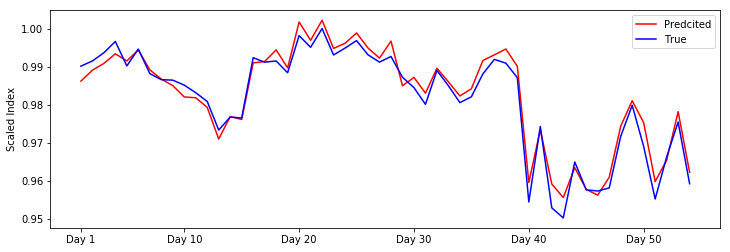

Cumulative return: 0.3301787383192455 | Profitability Performance: 0.9259259259259259 | MSE Loss: 0.00038453443135821885


In [12]:
encoder=EncoderRNN().cuda()
decoder = DecoderRNN().cuda()
encoder_optimizer = optim.Adam(encoder.parameters())
decoder_optimizer = optim.Adam(decoder.parameters())
criterion=nn.MSELoss()
    
checkpoint = torch.load('models/OpenPrice/model_947.pth')
encoder.load_state_dict(checkpoint['encoder_state_dict'])
decoder.load_state_dict(checkpoint['decoder_state_dict'])
encoder_optimizer.load_state_dict(checkpoint['encoder_optimizer_state_dict'])
decoder_optimizer.load_state_dict(checkpoint['decoder_optimizer_state_dict'])
encoder.eval()
decoder.eval()

eval_loss,y_pred,y_true=test(encoder,decoder, test_loader, criterion)
pred_perf=pp(y_pred,y_true)
daily_returns=cdr(y_pred,y_true)
    
plt.figure(figsize=(12,4))
plt.plot(range(1,len(y_pred)+1),y_pred,color='red',label='Predcited')
plt.plot(range(1,len(y_true)+1),y_true,color='blue',label='True')
plt.ylabel('Scaled Index')
plt.xticks([1,10,20,30,40,50],['Day 1', 'Day 10', 'Day 20', 'Day 30', 'Day 40', 'Day 50'])
plt.legend()
plt.show()
print ('Cumulative return: {} | Profitability Performance: {} | MSE Loss: {}'.format(daily_returns, pred_perf, eval_loss))
    

This code performs an evaluation and analysis of a trained model for predicting stock prices. It starts by initializing an instance of the EncoderRNN and DecoderRNN models and transferring them to the CUDA device. It also creates optimizer objects for both models using the Adam optimization algorithm and sets the loss criterion as the Mean Squared Error (MSE). The trained model checkpoint is loaded from models/OpenPrice/model_947.pth. Encoder, decoder, and optimizer state dictionaries are stored in the checkpoint. The code restores the state of these objects from the checkpoint using the load_state_dict() method. The encoder and decoder are then set to evaluation mode. As a result, any layers or modules in the models that behave differently during training and evaluation are correctly configured. To obtain the evaluation loss (eval_loss), predicted values (y_pred), and true values (y_true), the test() function is called with the encoder, decoder, test_loader, and criterion as inputs. Based on the predicted and true values, the pp() function calculates the profitability performance (pred_perf) using y_pred and y_true.  The cdr() function Using the predicted and true values, the code calculates the cumulative daily returns (daily_returns). Finally, the code plots the predicted and true values using matplotlib. It also prints the cumulative return, profitability performance, and MSE loss for the evaluation. Basically, this code evaluates the trained model's performance on test data, calculates key metrics, and visualizes predicted and true stock prices.

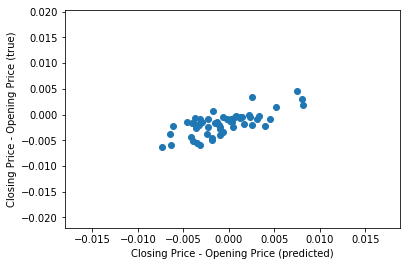

In [17]:
a=test_df['Open Price'].values
a=a[-54:]
plt.scatter(y_pred-a,y_true-a)
plt.ylabel('Closing Price - Opening Price (true)')
plt.xlabel('Closing Price - Opening Price (predicted)')
plt.show()

This code performs a scatter plot to visualize the difference between the predicted and true closing prices of a stock, relative to the difference between the opening and true closing prices.

The variable 'a' is first assigned the 54 most recent values of the 'Open Price' column from the test dataframe. The stock's opening price is represented by these values. On the x-axis, the code plots the differences between the predicted closing prices (y_pred) and the opening prices (a), and on the y-axis, the differences between the true closing prices (y_true) and the opening prices (a). As a result, a visual comparison can be made between the predicted closing prices and the true closing prices. On the plot, the y-axis is labeled 'Closing Price - Opening Price (true)', while the x-axis is labeled 'Closing Price - Opening Price (predicted)'. Finally, the plot is displayed using matplotlib. This code provides a visual representation of the differences between predicted and true closing prices for a stock, taking into account the opening price. To serve as a guide.

In [16]:
np.corrcoef(y_pred-a,y_true-a)

array([[1.        , 0.72497275],
       [0.72497275, 1.        ]])

This code computes the correlation coefficient between two arrays: 'y_pred - a' and 'y_true - a'. 'Y_pred' and 'Y_true' represent predicted and true closing prices, respectively. A stock's opening prices are represented in the array 'a'. We can calculate the difference between the closing prices and the opening prices for each corresponding data point by subtracting the opening prices 'a' from both the predicted and true closing prices. In order to calculate the correlation coefficient between these two difference arrays, we use the function np.corrcoef. Correlation coefficients measure the strength and direction of linear relationships. An index of -1 to 1 indicates a strong positive correlation, a value of -1 indicates a strong negative correlation, and a value of 0 indicates a weak or no correlation. To assess the linear relationship between these variables, this code computes a correlation coefficient between the differences between the predicted and true closing prices (relative to the opening prices).